In [2]:
# 1.

def eigenvector_centrality(G, loop=100, prec=1e-6):
    n = len(G)
    centrality = {v: 1.0 for v in G}

    for _ in range(loop):
        new_centrality = {v: 0 for v in G}
        norm = 0

        for v in G:
            for w in G[v]:
                new_centrality[v] += centrality[w]
            norm += new_centrality[v] ** 2

        norm = norm ** 0.5

        if norm == 0:
            return centrality

        for v in new_centrality:
            new_centrality[v] /= norm

        diff = sum(abs(new_centrality[v] - centrality[v]) for v in G)
        if diff < prec:
            return new_centrality

        centrality = new_centrality

    return centrality

2.

subcritical үед компонентүүд нь жижиг ба хэт том компонент байхгүй.
critical үед хуваагдсан кластерууд байна.
supercritical үед том компонентүүд байна.
connected үед граф бүрэн холбогдсон байна.

In [3]:
# 2.

import networkx as nx
import matplotlib.pyplot as plt

G = nx.erdos_renyi_graph(30, 0.1)
nx.draw(G, node_size=30, with_labels=True, edge_color="lightblue")
# plt.show()
plt.savefig("../results/graph.png")
plt.close()

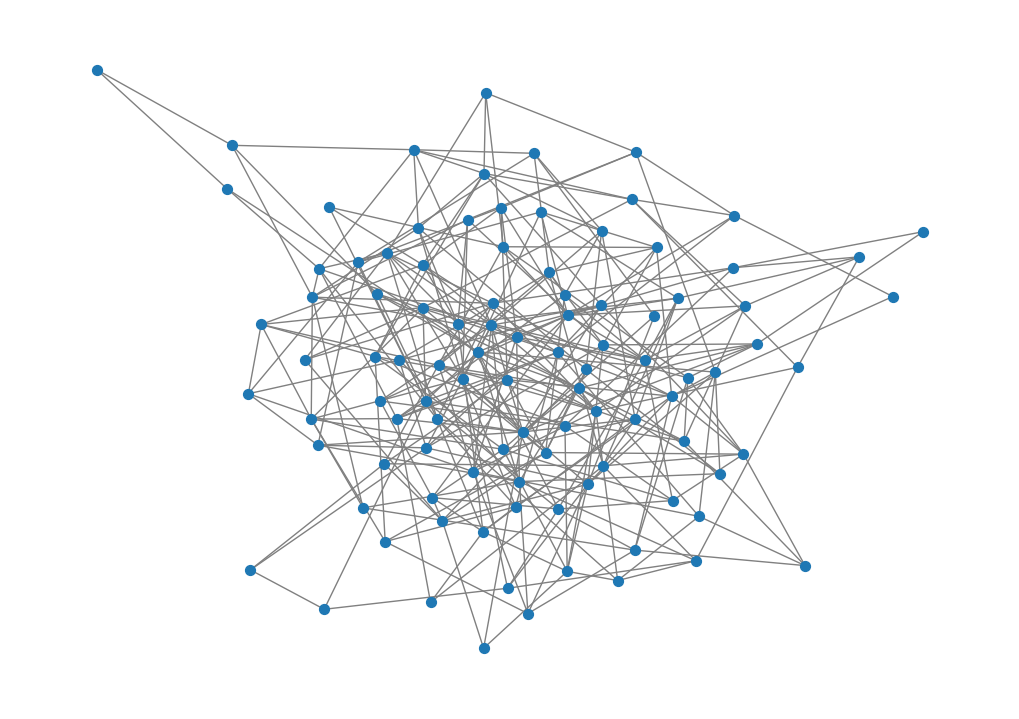

In [4]:
# 3.

n = 100
p = 0.06

G = nx.erdos_renyi_graph(n, p)

plt.figure(figsize=(10, 7))
nx.draw(G, node_size=50, with_labels=False, edge_color="gray")
plt.savefig("../results/graph_100_0.06.png")

In [5]:
# 4.

nx.average_shortest_path_length(G)

2.6937373737373735

In [6]:
# 5.

def compute_pagerank(graph, alpha=0.85, max_iter=100, tol=1.0e-6):
  N = len(graph)
  pagerank = {node: 1 / N for node in graph}
  for _ in range(max_iter):
    new_pagerank = {}
    for node in graph:
      sum_rank = sum(pagerank[neighbor] / len(graph[neighbor]) for neighbor in graph.predecessors(node))
      new_pagerank[node] = (1 - alpha) / N + alpha * sum_rank

    if sum(abs(new_pagerank[node] - pagerank[node]) for node in graph) < tol:
      break

    pagerank = new_pagerank

  return pagerank

5.

PageRank тооцоолох алгоритм нь үндсэн 4 хэсгээс бүрдэнэ. 1. Эхлүүлэх: Бүх оройнуудад ижил PageRank оноо өгнө PR=1/N. 2.
Давтах: Өөрчлөлт гарахаа болих хүртэл PageRank-ийг шинэчилнэ. 3.
Нэгтгэх: Давтах явцад өөрчлөлт нь босго онооноос бага буюу өөрчлөлт гарахаа больсон үед зогсох. 4.
Нормальчлал: Оноонуудын нийлбэр 1-тэй тэнцүү эсэхийг шалгах.